In [31]:
import kaggle
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def downloadCSV():
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files('fedesoriano/stroke-prediction-dataset', path='.', unzip=True)
    data = pd.read_csv('healthcare-dataset-stroke-data.csv')

def dropNaN():
    data = pd.read_csv('healthcare-dataset-stroke-data.csv')
    data = data.dropna()
    return data

def NormalizeData(data):
    data = data.astype({"age": np.int64})
    for col in data.columns:
        if data[col].dtype == object: # STRINGS TO LOWERCASE
            data[col] = data[col].str.lower()
        if data[col].dtype == np.float64: # FLOATS TO VALUES IN [ 0, 1]
            dataReshaped = data[col].values.reshape(-1,1)
            scaler = MinMaxScaler(feature_range=(0, 1))
            data[col] = scaler.fit_transform(dataReshaped)
        if col == 'ever_married': # YES/NO TO 1/0
            data[col] = data[col].map(dict(yes=1, no=0))
        if col == 'smoking_status':
            data[col] = data[col].str.replace(" ", "_")
        if col == 'work_type':
            data[col] = data[col].str.replace("-", "_")
    return data

def saveToCSV(data1,data2,data3):
    data1.to_csv("data_train.csv", index=False)
    data2.to_csv("data_test.csv",index=False)
    data3.to_csv("data_val.csv",index=False)

def describeDataset(dt, dt2, dv):
    data = pd.read_csv('healthcare-dataset-stroke-data.csv')
    print("Whole dataset size: ", data.size)
    print("Train dataset size: ", dt.size)
    print("Test dataset size: ", dt2.size)
    print("Validate dataset size: ", dv.size)
    print(data.describe(include='all'))


downloadCSV()
data = dropNaN()
data = NormalizeData(data)

data_train, data_test = train_test_split(data, test_size=0.2, random_state=1)
data_train, data_val = train_test_split(data_train, test_size=0.25, random_state=1) ## Twice to get 0.6, 0.2, 0.2
saveToCSV(data_train,data_test,data_val)
describeDataset(data_train,data_test,data_val)



Whole dataset size:  61320
Train dataset size:  35340
Test dataset size:  11784
Validate dataset size:  11784
                  id  gender          age  hypertension  heart_disease  \
count    5110.000000    5110  5110.000000   5110.000000    5110.000000   
unique           NaN       3          NaN           NaN            NaN   
top              NaN  Female          NaN           NaN            NaN   
freq             NaN    2994          NaN           NaN            NaN   
mean    36517.829354     NaN    43.226614      0.097456       0.054012   
std     21161.721625     NaN    22.612647      0.296607       0.226063   
min        67.000000     NaN     0.080000      0.000000       0.000000   
25%     17741.250000     NaN    25.000000      0.000000       0.000000   
50%     36932.000000     NaN    45.000000      0.000000       0.000000   
75%     54682.000000     NaN    61.000000      0.000000       0.000000   
max     72940.000000     NaN    82.000000      1.000000       1.000000   

 

<AxesSubplot:>

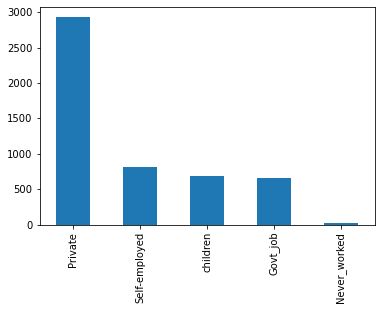

In [27]:
data_orginal = pd.read_csv('healthcare-dataset-stroke-data.csv')
data_orginal['work_type'].value_counts().plot(kind="bar")


<AxesSubplot:>

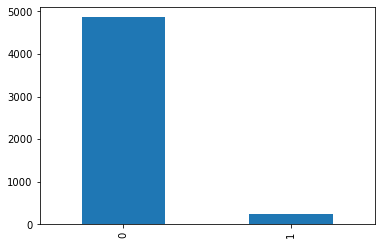

In [23]:
data_orginal['stroke'].value_counts().plot(kind="bar")


<AxesSubplot:>

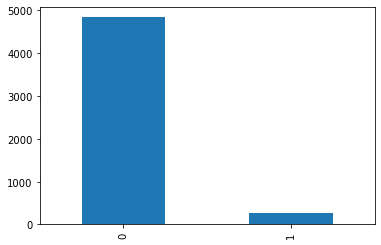

In [24]:
data_orginal['heart_disease'].value_counts().plot(kind="bar")


<AxesSubplot:>

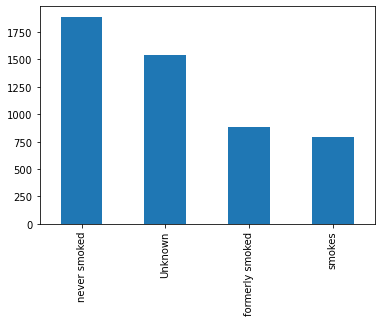

In [25]:
data_orginal['smoking_status'].value_counts().plot(kind="bar")


<AxesSubplot:>

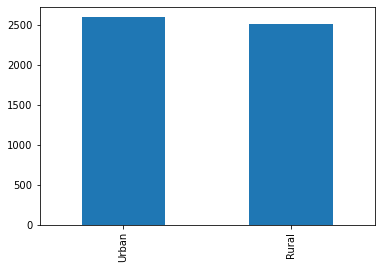

In [28]:
data_orginal['Residence_type'].value_counts().plot(kind="bar")